# In this script, time series of puckering parameters and dihedral will be analysed

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# this function is from http://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
def smooth(x,window_len=31,window='flat'):

    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


filename = "/home/winter/onsager/pucker6.dat"
raw = np.genfromtxt(filename, skip_header=1, skip_footer=0)
print ("raw.shape is")
print (raw.shape)

frame = raw[:,0]
avg = raw[:,1]
phi = raw[:,2] - 60   # Shifting by 60 degrees ensures that I get main puckering state of 0 and 180 degrees.
amp = raw[:,3]
theta = raw[:,4]

# Phase unwrapping. Note that if input data is too bad, i.e. too much oscillation between like -179 and 179, phase unwrapping would fail
con = np.copy(avg)
for i in range(1,avg.size): 
    diff=con[i]-con[i-1]
    if diff > 180:
        con[i:] -= 360
    elif diff < -180:
        con[i:] += 360

#t = np.linspace(0,len(raw)*0.0002,num=len(con))  # time in ns

sdih = smooth(con)
sphi = smooth(phi)
samp = smooth(amp)
stheta = smooth(theta)



raw.shape is
(353480, 5)


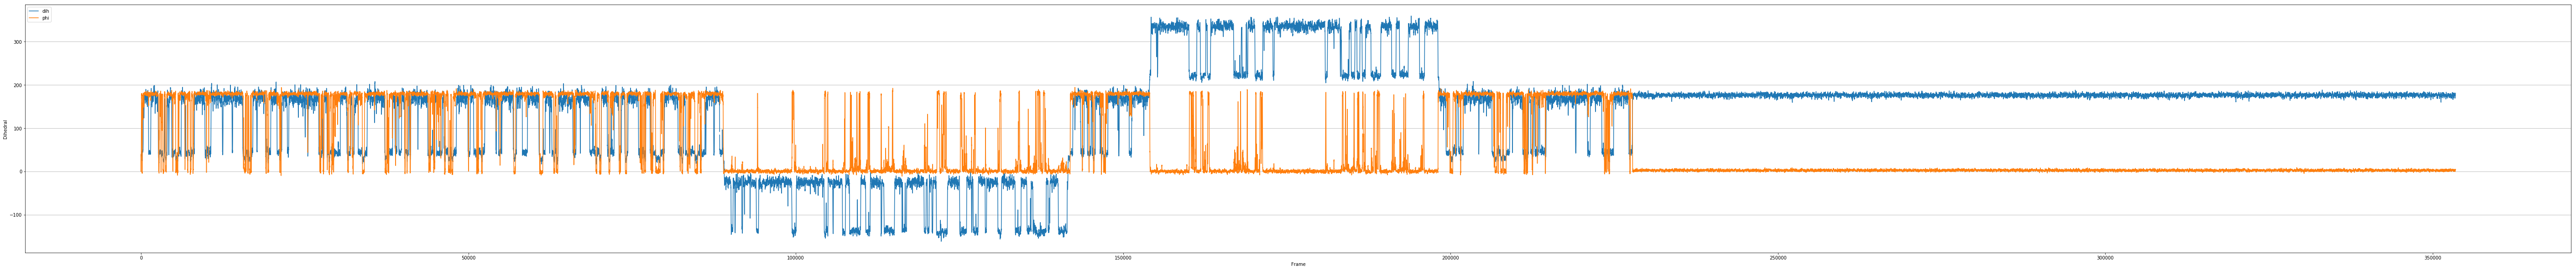

In [5]:
%matplotlib inline

plt.rcParams['agg.path.chunksize'] = 10000
plt.figure(figsize=(100,10))
plt.plot(frame,sdih[0:-30])
plt.plot(frame,sphi[0:-30])
plt.xlabel('Frame')
plt.ylabel('Dihedral')
plt.grid(True,axis='y')
plt.legend(['dih', 'phi'], loc='upper left')
plt.show()

# # Zoom in intial unstable 
# plt.rcParams['agg.path.chunksize'] = 10000
# plt.figure(figsize=(100,10))
# plt.plot(frame[:2000],phi[:2000])
# plt.xlabel('simulation time/ns')
# plt.ylabel('Dihedral')
# plt.grid(True,axis='y')
# plt.show()

# Above plot shows that 1. dih and phi are changing together. 2. there are basically only two puckering state, 0 and 180. Theta is always close to 90 btw. Amp is basically changing together with dih and phi btw.